# E-tivity 3: Clustering and Manifold Learning

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

### Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

### Task 1

- Download the dataset loans_dataset_et3.csv. This is a subset of the loans dataset used in the example notebooks for E-tivity1 and E-tivity2 which has only the examples with loan status Yes and preselected features. &#9745;

In [2]:
data = pd.read_csv('loans_dataset_et3.csv')
data.head()
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


In [3]:
data.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
327,5417,4196.0,267,360,1
328,16666,0.0,275,360,1
329,10750,0.0,312,360,1
330,5955,5625.0,315,360,1
331,6133,3906.0,324,360,1


In [4]:
data.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
dtype: object

### B. Scale the Data
All attributes are numerical so we can proceed to scaling the data. To decide which scaler is suitable we will examine the distribution of our attributes


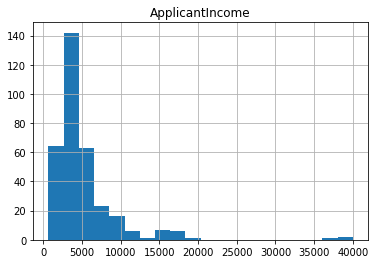

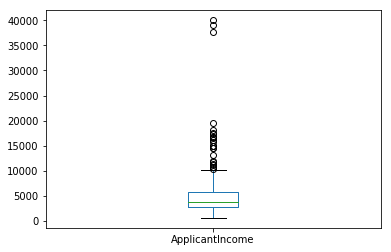

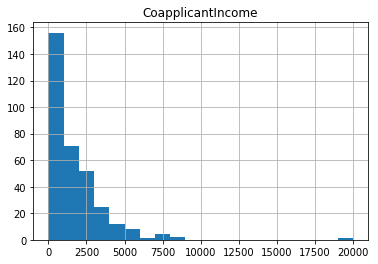

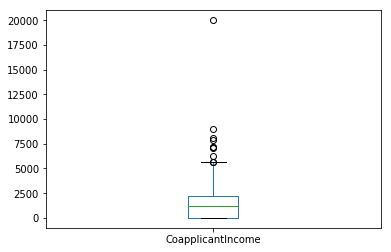

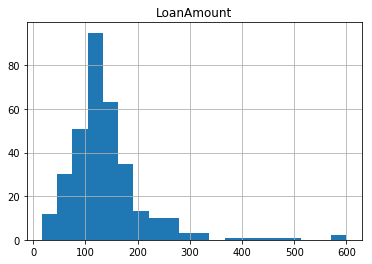

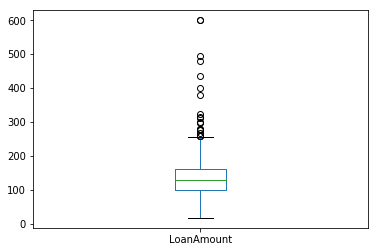

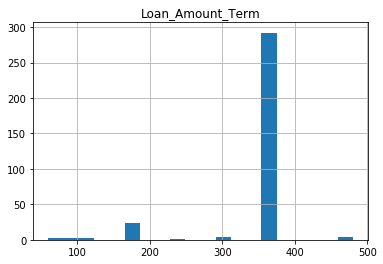

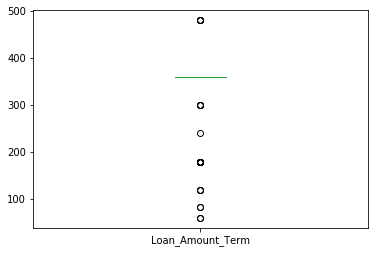

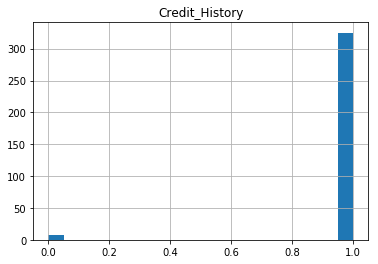

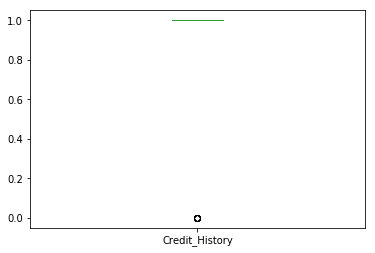

In [5]:
def plot_data(data):
    for col in data.columns:
        plt.title(col)
        data[col].hist(bins=20)
        plt.show()
        data[col].plot.box()
        plt.show()

plot_data(data)

A standard scaler transforms the data by removing the mean value of each feature to center it, then scale it by dividing non-constant features by their standard deviation.

As our dataset has many outliers we will be trying the sklearn robust scaler which is similar to a standard scaler except it uses more robust estimates for the center and range of the data. 

In [6]:
standard_scaler = preprocessing.StandardScaler()
standard_data = standard_scaler.fit_transform(data)
standard_dataframe = pd.DataFrame(standard_data, columns=data.columns)

robust_scaler = preprocessing.RobustScaler()
robust_data = robust_scaler.fit_transform(data)
robust_dataframe = pd.DataFrame(robust_data, columns=data.columns)

min_max_scaler = preprocessing.MinMaxScaler()
min_max_data = min_max_scaler.fit_transform(data)
min_max_dataframe = pd.DataFrame(min_max_data, columns=data.columns)

normalizer = preprocessing.Normalizer()
normal_data = normalizer.fit_transform(data)
normal_dataframe = pd.DataFrame(min_max_data, columns=data.columns)

normal_robust_data = standard_scaler.fit_transform(normal_data)
normal_robust_dataframe = pd.DataFrame(normal_robust_data, columns=data.columns)

robust_data_no_credit_history = robust_scaler.fit_transform(data.drop('Credit_History', axis=1))

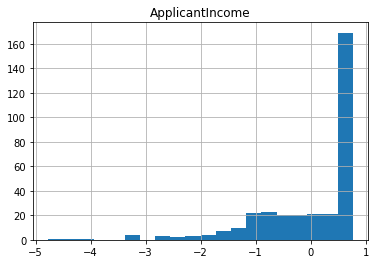

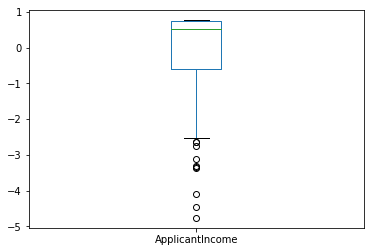

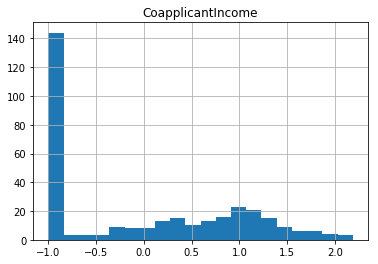

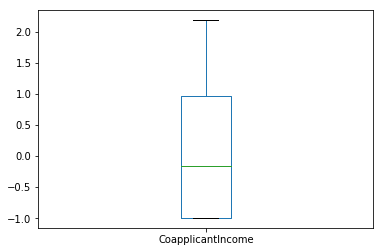

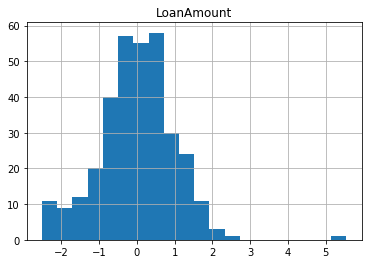

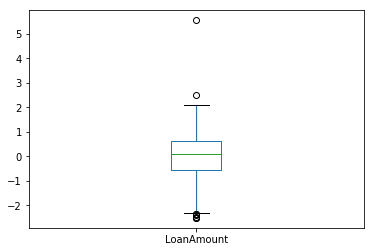

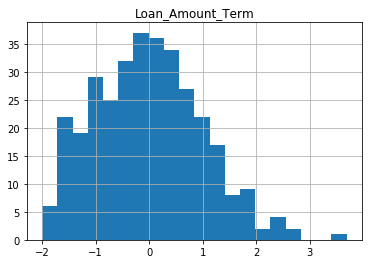

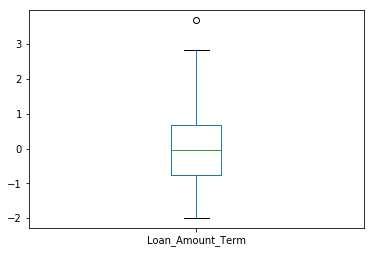

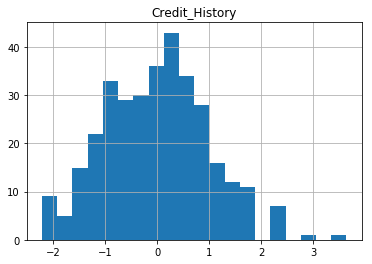

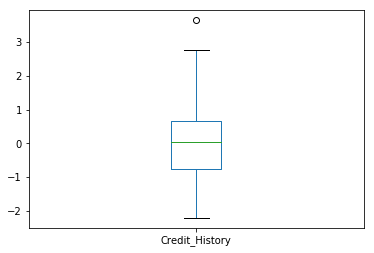

In [7]:
plot_data(normal_robust_dataframe)

In [41]:
### C. Scatterplot Function (to be used below for visualising a clustering)

colors = np.array(['orange', 'blue', 'lime', 'black', 'yellow', 'pink', 'grey', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')
    plt.show()

In [42]:
def k_means(data, k):
    ### D. K-Means Clustering
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

    ### E. Apply a manifold-learning technique to project the data set to a 2D space


    # append the cluster centers to the dataset
    data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

    #### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

    # project both the data and the k-Means cluster centers to a 2D space
    XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
    print("transformation complete")

    # plot the transformed examples and the centers
    # use the cluster assignment to colour the examples
    clustering_scatterplot(points=XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_, 
                           centers=XYcoordinates[-k:,:], 
                           title='MDS')
    #### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

    # project both th data and the k-Means cluster centers to a 2D space
    XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
    print("transformation complete")

    # plot the transformed examples and the centers
    # use the cluster assignment to colour the examples
    # plot the transformed examples and the centers
    # use the cluster assignment to colour the examples
    clustering_scatterplot(points=XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_,
                           centers=XYcoordinates[-k:,:], 
                           title='TSNE')
    return clustered_data_sklearn

transformation complete


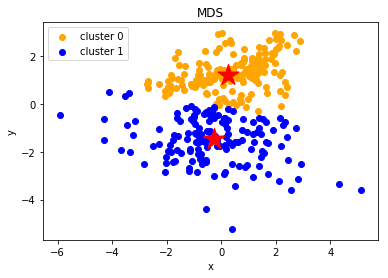

transformation complete


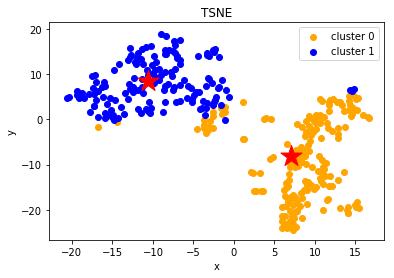

transformation complete


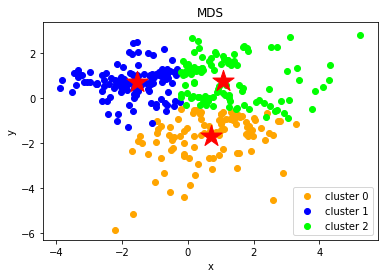

transformation complete


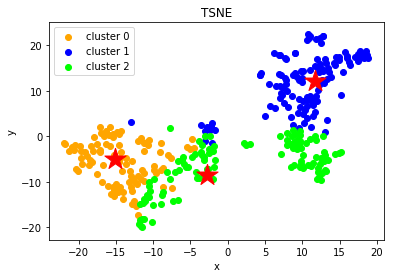

transformation complete


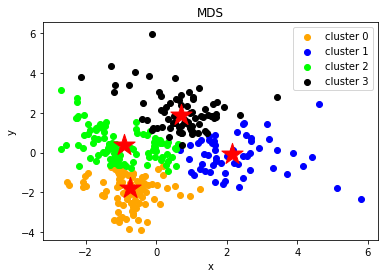

transformation complete


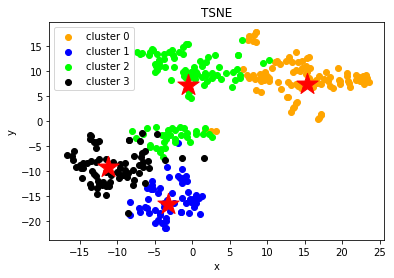

transformation complete


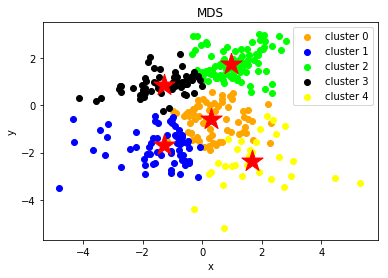

transformation complete


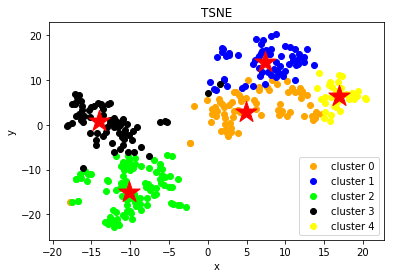

transformation complete


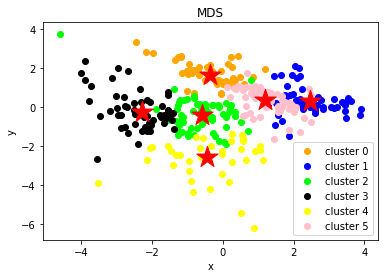

transformation complete


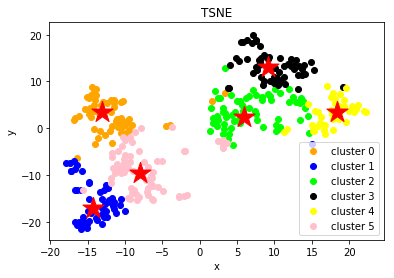

transformation complete


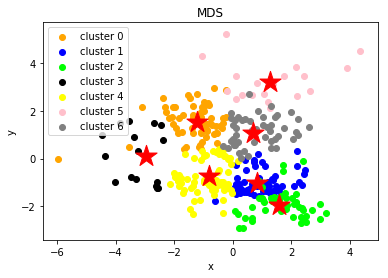

transformation complete


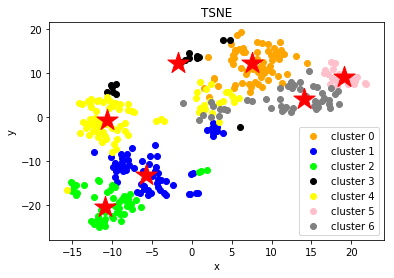

In [44]:
results = dict()
for i in range(2,8):
    results[i] = k_means(normal_robust_data, i)

In [48]:
data['cluster'] = pd.Series(results[5].labels_, index=data.index)

In [49]:
data.mean()

ApplicantIncome      5201.093373
CoapplicantIncome    1495.508795
LoanAmount            140.882530
Loan_Amount_Term      341.710843
Credit_History          0.978916
cluster                 1.765060
dtype: float64

In [50]:
data.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,4300.863014,2503.493151,165.205479,340.109589,0.986301
1,2375.015873,1791.806349,110.238095,356.190476,1.000000
2,9578.020833,327.968750,172.135417,326.250000,0.958333
3,3582.840580,103.335072,94.753623,356.521739,1.000000
4,3111.870968,5234.032258,151.774194,330.967742,0.935484


Our clusters seems to imply the following information:
 - group 0 contains applications for applicant has a significantly above average income and coapplicant has above average income and they are looking for an above average loan.
 - group 1 contains applications where both the applicant and co applicant are looking for a loan which is less than average
 - group 2 contains applications where applicant has lower than average income while coappliant has a significantly above average income
 - group 3 contains those with a bad credit history
 - group 1 contains applications where the applicant has average income while the coapplicant has below average income for a small loan over short term
 
**note on rerunning the notebook I had the same categories just with different cluster labels**